In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from datetime import datetime

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


play_store dataframe has 10841 rows and 13 columns

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Data Cleaning

### Handling the NaN values

In [7]:
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  temp=pd.DataFrame(index=df.columns)
  temp["datatype"]=df.dtypes
  temp["not null values"]=df.count()
  temp["null value"]=df.isnull().sum()
  temp["% of the null value"]=df.isnull().mean()
  temp["unique count"]=df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


In [8]:
# The rows containing NaN values in the Android Ver column

df[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# Finding the different values the 'Android Ver' column takes
df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [10]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
df=df[df['Android Ver'].notna()]
# Shape of the updated dataframe
df.shape

(10838, 13)

In [11]:
# The rows containing NaN values in the Current Ver column

df[df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [12]:
# Finding the different values the 'Current Ver' column takes
df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [13]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
df=df[df["Current Ver"].notna()]
# Shape of the updated dataframe
df.shape

(10830, 13)

In [14]:
# The row containing NaN values in the Type column
df[df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [15]:
# Finding the different values the 'Type' column takes
df["Type"].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

In [16]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
df.loc[9148,'Type']='Free'

In [17]:
df.isna().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [18]:
# The rows containing NaN values in the Rating column
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating'>

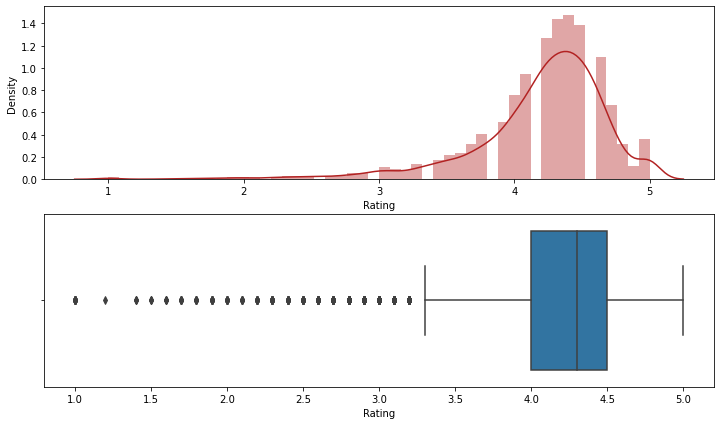

In [19]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=df, ax=ax[1])

In [20]:
# Replacing the NaN values in the 'Rating' colunm with its median value
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [21]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Handling duplicate values

In [22]:
# Handling the error values in the Play store data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [24]:
# Inspecting the duplicates values.
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [25]:
# Inspecting the duplicates values.
df[df['App']=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [26]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [27]:
# dropping duplicates from the 'App' column.
df.drop_duplicates(subset = 'App', inplace = True)
df.shape

(9649, 13)

In [28]:
# Checking whether the duplicates in the 'App' column are taken care of or not
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


### Changing datatype

In [29]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [30]:
df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [31]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [32]:
# The drop_dollar funtion applied to the price column
df['Price']=df['Price'].apply(lambda x: convert_dollar(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [33]:
df[df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


In [34]:
# Checking the contents of the 'Installs' column
df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [35]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [36]:
# The drop_plus funtion applied to the main dataframe

df['Installs'] = df['Installs'].apply(lambda x: convert_plus(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [37]:
# Checking the contents of the 'Installs' column
df['Installs'].value_counts()

1000000       1416
100000        1112
10000         1029
10000000       937
1000           886
100            709
5000000        607
500000         504
50000          468
5000           467
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [38]:
df[df['Installs']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,4.3,0,5.5M,0,Paid,1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7M,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,4.3,0,7.4M,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0,33M,0,Paid,2.99,Everyone,Education,2016-04-15,1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,4.3,0,5.4M,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,4.3,0,5.9M,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up
8081,CX Network,BUSINESS,4.3,0,10M,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,4.3,0,2.1M,0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,4.3,0,1.2M,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [39]:
# Checking the contents of the 'Size' column
df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [40]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [41]:
# The kb_to_mb funtion applied to the size column

df['Size'] = df['Size'].apply(lambda x: convert_kb_to_mb(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [42]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [43]:
# Converting the datatype of the values in the reviews column from string to int
df['Reviews'] = df['Reviews'].astype(int)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int32         
 4   Size            8422 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 1017.7+ KB


In [45]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9649.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,20.413556,7.785404e+06,1.100079
std,0.496528,1.832255e+06,21.833485,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


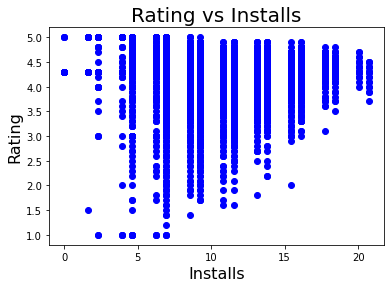

In [46]:
Rating = df['Rating']
Installs = df['Installs']
Reviews = df['Reviews']

plt.scatter(np.log(Installs),Rating,c='b',marker='o')
plt.xlabel('Installs', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.title('Rating vs Installs',fontsize=20)
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


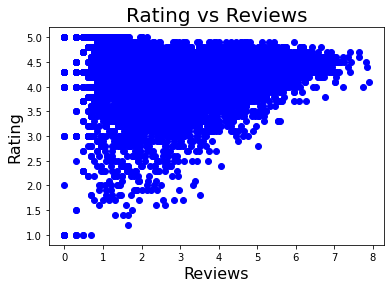

In [47]:
plt.scatter(np.log10(Reviews),Rating,c='b',marker='o')
plt.xlabel('Reviews', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.title('Rating vs Reviews',fontsize=20)
plt.show()

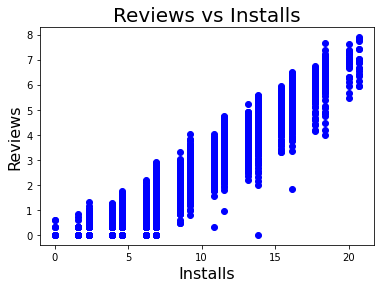

In [48]:
plt.scatter(np.log(Installs),np.log10(Reviews),c='b',marker='o')
plt.xlabel('Installs', fontsize=16)
plt.ylabel('Reviews', fontsize=16)
plt.title('Reviews vs Installs',fontsize=20)
plt.show()

### Inspect some error

In [49]:
df[(df['Installs'] == 0) & (df['Reviews'] == 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,4.3,0,5.5,0,Paid,1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,4.3,0,7.4,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0,33.0,0,Paid,2.99,Everyone,Education,2016-04-15,1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,4.3,0,5.4,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,4.3,0,5.9,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up
8081,CX Network,BUSINESS,4.3,0,10.0,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,4.3,0,2.1,0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,4.3,0,1.2,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up
9148,Command & Conquer: Rivals,FAMILY,4.3,0,NaN,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [50]:
#removing the instance with 0 installs and 0 reviews
df.drop(df[(df['Installs'] == 0) & (df['Reviews'] == 0)].index, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9634 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9634 non-null   object        
 1   Category        9634 non-null   object        
 2   Rating          9634 non-null   float64       
 3   Reviews         9634 non-null   int32         
 4   Size            8408 non-null   float64       
 5   Installs        9634 non-null   int64         
 6   Type            9634 non-null   object        
 7   Price           9634 non-null   float64       
 8   Content Rating  9634 non-null   object        
 9   Genres          9634 non-null   object        
 10  Last Updated    9634 non-null   datetime64[ns]
 11  Current Ver     9634 non-null   object        
 12  Android Ver     9634 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 1016.1+ KB


In [52]:
df[df['Installs'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## User Review Dataset

In [53]:
df2 = pd.read_csv("googleplaystore_user_reviews.csv")

In [54]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [56]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [57]:
df2.shape

(64295, 5)

In [58]:
def Urinfo():
  temp1=pd.DataFrame(index=df2.columns)
  temp1["datatype"]=df2.dtypes
  temp1["not null values"]=df2.count()
  temp1["null value"]=df2.isnull().sum()
  temp1["% of the null value"]=df2.isnull().mean().round(4)*100
  temp1["unique count"]=df2.nunique()
  return temp1
Urinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


### Handling NaN values

In [59]:
# Finding the total no of NaN values in each column.
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [60]:
# checking the NaN values in the translated rview column
df2[df2['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [61]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
df2[df2['Translated_Review'].isnull() & df2['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [62]:
# Deleting the rows containing NaN values
df2 = df2.dropna()

In [63]:
df2.shape

(37427, 5)

In [64]:
# Inspecting the sentiment column
df2['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

## Merge dataframe

In [65]:
merged_df = pd.merge(df, df2, on='App', how = "inner")

In [66]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [67]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique() 
  return temp
merged_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,35929,0,0.000000,816
Category,object,35929,0,0.000000,33
Rating,float64,35929,0,0.000000,22
Reviews,int32,35929,0,0.000000,807
Size,float64,24069,11860,0.330095,166
Installs,int64,35929,0,0.000000,12
Type,object,35929,0,0.000000,2
Price,float64,35929,0,0.000000,9
Content Rating,object,35929,0,0.000000,5
Genres,object,35929,0,0.000000,67


### Saving clean data

In [68]:
#df.to_csv('Clean_apps_df.csv')
#df2.to_csv('Clean_reviews_df.csv')
#merged_df.to_csv('Clean_merged_df.csv')

In [69]:
# Group the dataset by app name and sum the number of installations
app_installs = df.groupby('App')['Installs'].sum()

# Sort the apps by popularity score in descending order
app_popularity = app_installs.sort_values(ascending=False)

# Print the top 10 apps by popularity score
print(app_popularity.head(20))

App
Google Photos                               1000000000
Google+                                     1000000000
Google                                      1000000000
Gmail                                       1000000000
Google News                                 1000000000
Skype - free IM & video calls               1000000000
Google Play Books                           1000000000
Google Play Games                           1000000000
Google Play Movies & TV                     1000000000
Google Street View                          1000000000
Google Chrome: Fast & Secure                1000000000
Facebook                                    1000000000
WhatsApp Messenger                          1000000000
Hangouts                                    1000000000
Instagram                                   1000000000
Subway Surfers                              1000000000
Messenger – Text and Video Chat for Free    1000000000
Maps - Navigate & Explore                   1000000000
YouTub

In [70]:
# Filter out apps with more than 1 billion installs
popular_threshold = 1000000000  # 1 billion
popular_apps = df[df['Installs'] >= popular_threshold]

In [71]:
popular_apps['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

**remove/exclude the popular_apps for the novelty reason (overly popular)**

In [72]:
# Create a list of popular apps
popular_apps = list(popular_apps['App'])

In [73]:
# Filter out the rows that contain the popular apps
df = df[~df['App'].isin(popular_apps)]

In [74]:
df[df['App'] == 'WhatsApp Messenger']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Overview dataset

In [75]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9614.000000,9.614000e+03,8406.000000,9.614000e+03,9614.000000
mean,4.192261,1.759741e+05,20.420124,5.733447e+06,0.978703
std,0.497310,1.117186e+06,21.833269,2.916964e+07,15.681957
min,1.000000,0.000000e+00,0.008300,1.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.920675e+04,28.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,5.000000e+08,400.000000


In [76]:
df.describe(include='O')

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,9614,9614,9614,9614,9614,9614,9614
unique,9614,33,2,6,118,2813,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up
freq,1,1826,8871,7870,823,1036,2196


### Paid vs Free Apps

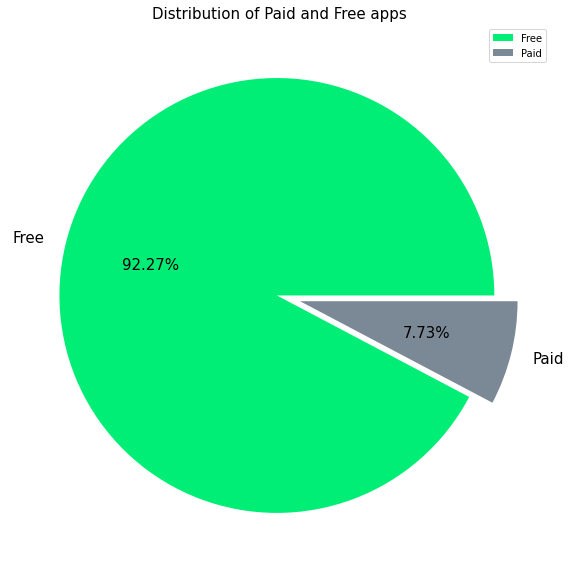

In [77]:
data = df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

### Top category

In [78]:
df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1826
GAME                    958
TOOLS                   824
BUSINESS                419
MEDICAL                 394
PERSONALIZATION         373
PRODUCTIVITY            372
LIFESTYLE               368
FINANCE                 343
SPORTS                  325
COMMUNICATION           309
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             280
NEWS_AND_MAGAZINES      252
SOCIAL                  234
BOOKS_AND_REFERENCE     220
TRAVEL_AND_LOCAL        216
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           161
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           101
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           62
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [79]:
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

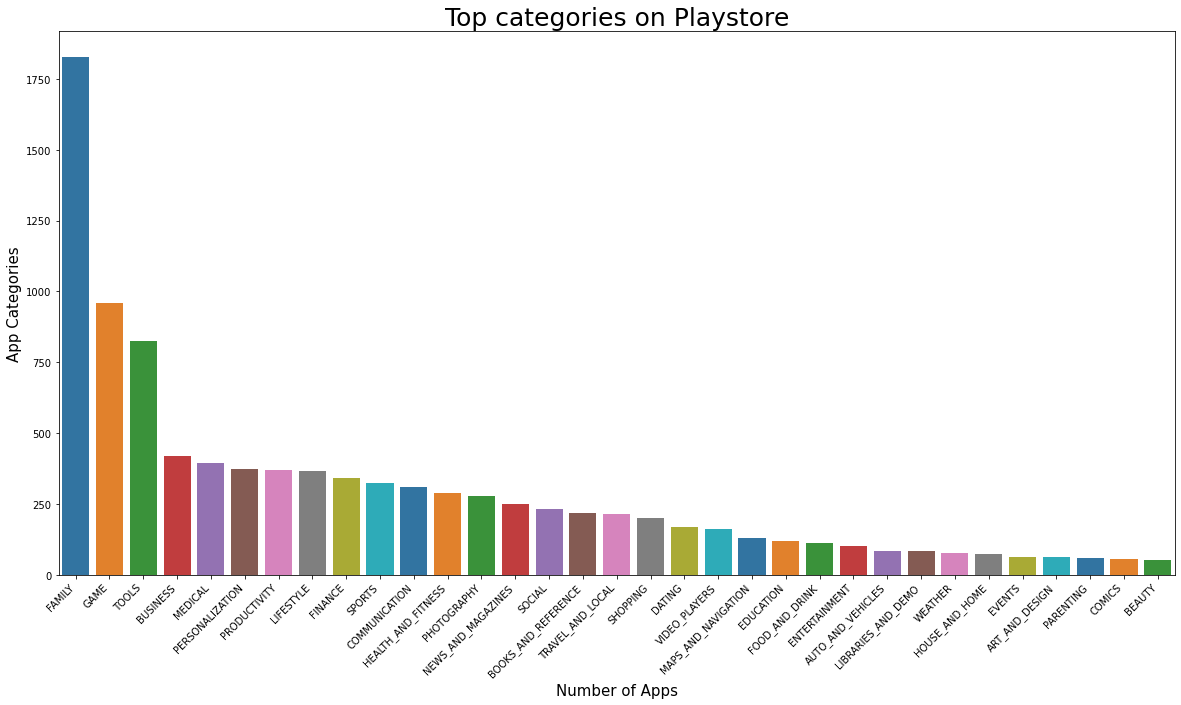

In [80]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

### Category Apps based on number of installs

Text(0.5, 1.0, 'Total app installs in each category')

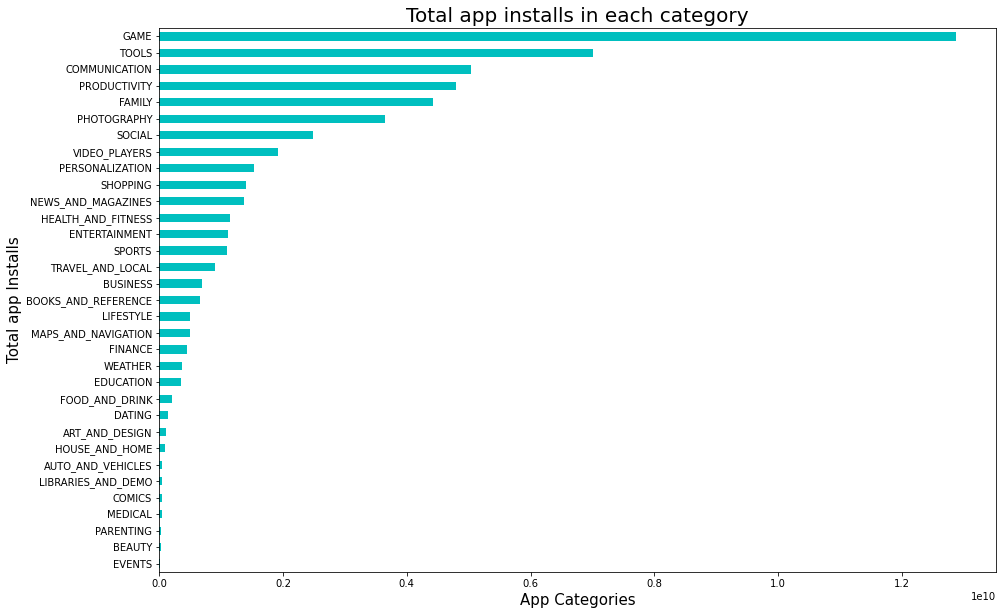

In [81]:
# total app installs in each category of the play store

a = df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

### Average rating of the Apps

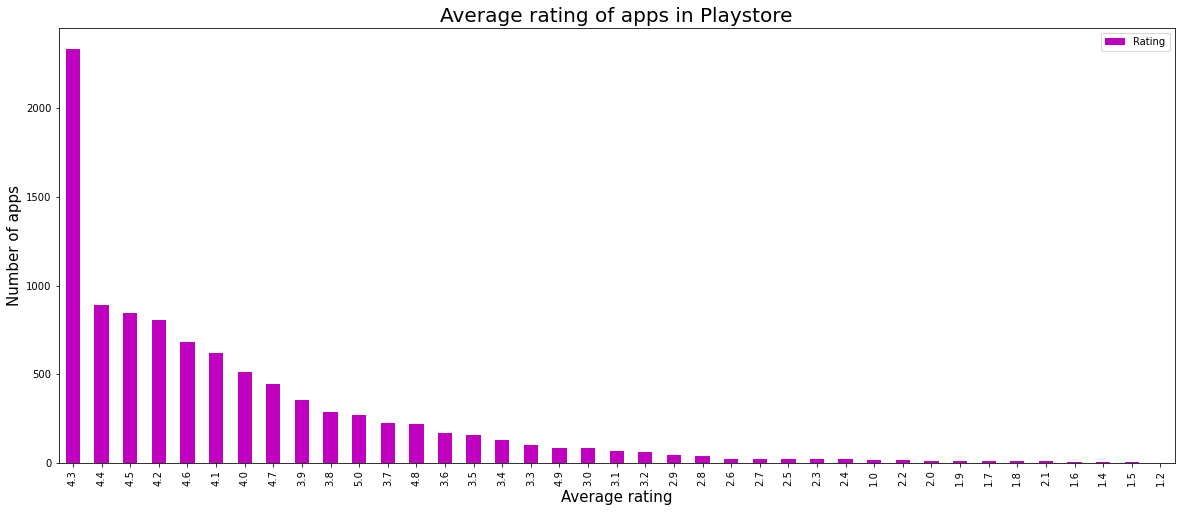

In [82]:
# Average app ratings

df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

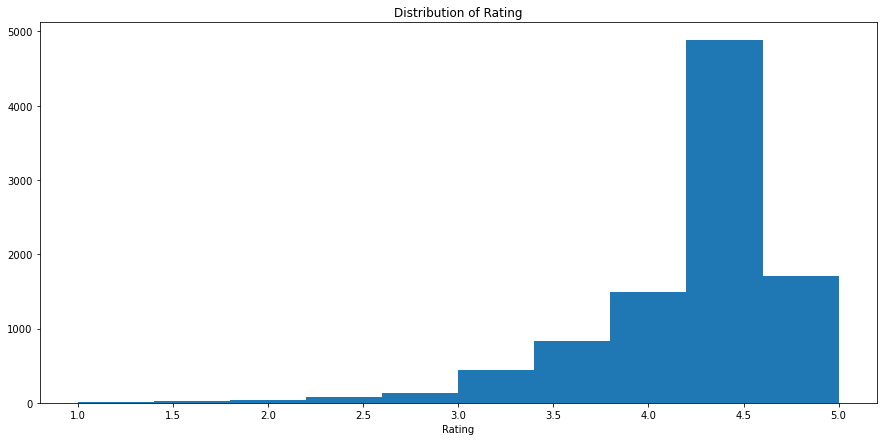

In [83]:
plt.figure(figsize=(15,7))
plt.xlabel("Rating")
plt.title("Distribution of Rating")
plt.hist(df[df['Rating'].notnull()]['Rating'])
plt.show()

### Review Sentiments

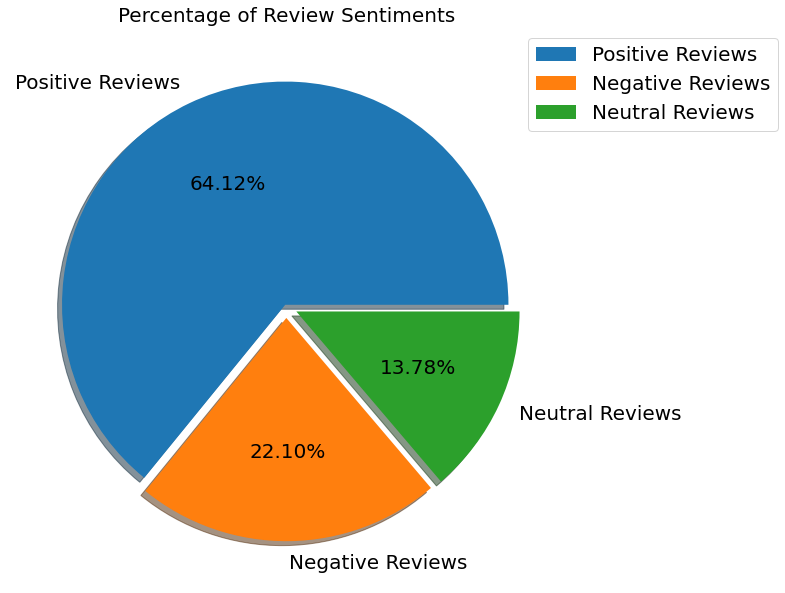

In [84]:
import matplotlib
counts = list(df2['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

### Apps with the highest number of positive reviews

In [85]:
# positive reviews
positive_ur_df=df2[df2['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


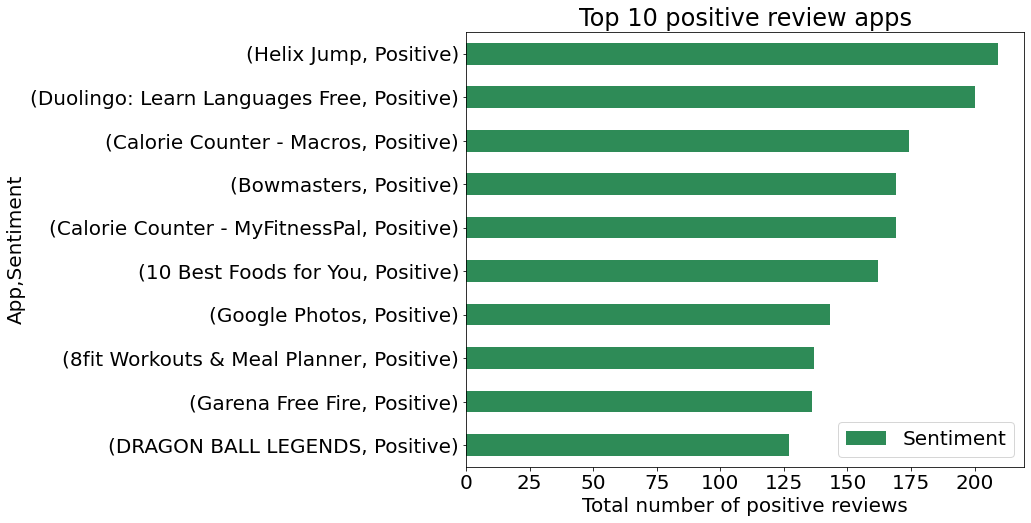

In [86]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

### Apps with the highest number of negative reviews

In [87]:
negative_ur_df=df2[df2['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


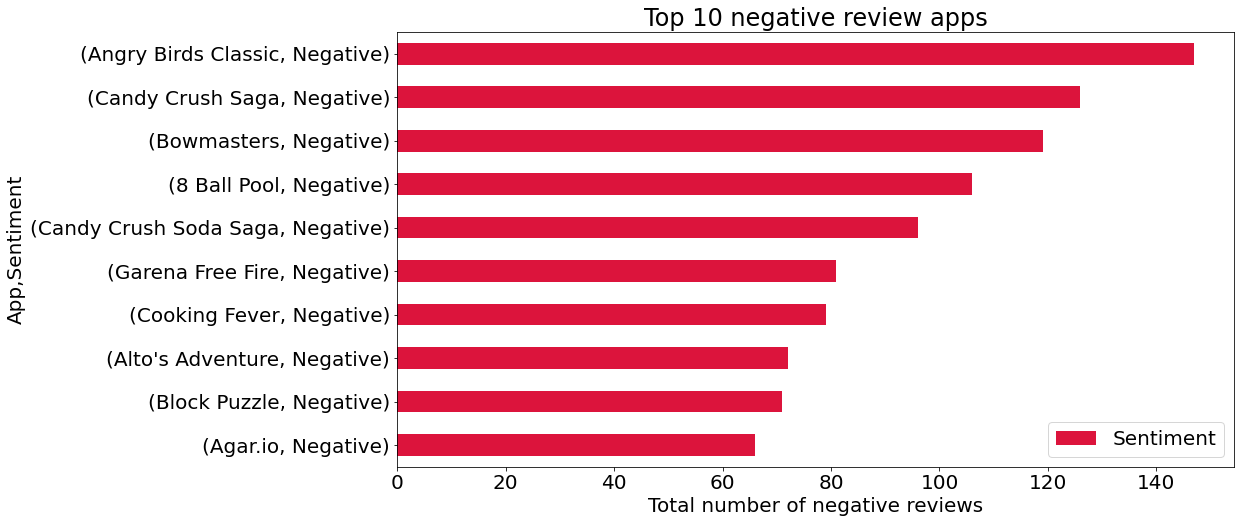

In [88]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

## 1) Popularity

In [89]:
filtered_df = df[df['Installs'] > 1000000]
sorted_df = filtered_df.sort_values(by='Installs', ascending=False)
print(sorted_df[['App', 'Installs']])

                                              App   Installs
2550                                     Snapchat  500000000
3255                   SHAREit - Transfer & Share  500000000
3265                 Gboard - the Google Keyboard  500000000
4005      Clean Master- Space Cleaner & Antivirus  500000000
378   UC Browser - Fast Download Private & Secure  500000000
...                                           ...        ...
3358                              Golden Launcher    5000000
3390      Photo Lock App - Hide Pictures & Videos    5000000
3391                   Romantic Love Photo Frames    5000000
3394                  Water Garden Live Wallpaper    5000000
3355               XOS - Launcher,Theme,Wallpaper    5000000

[1958 rows x 2 columns]


Text(0.5, 1.0, 'Total app installs > 1 million')

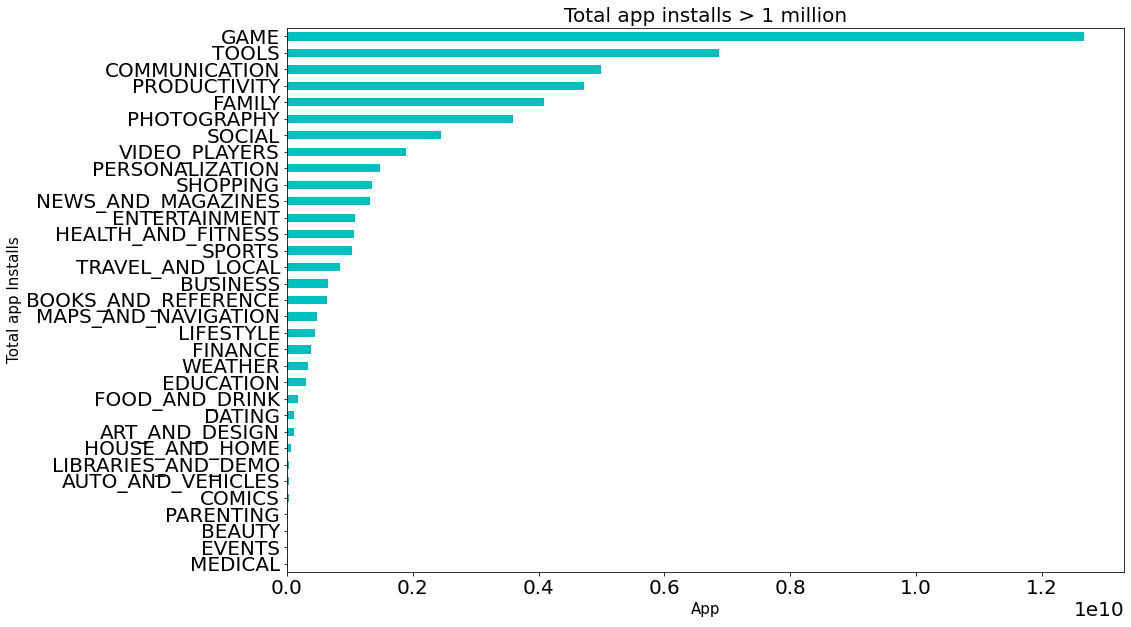

In [90]:
a = filtered_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App', fontsize = 15)
plt.xticks()
plt.title('Total app installs > 1 million', fontsize = 20)

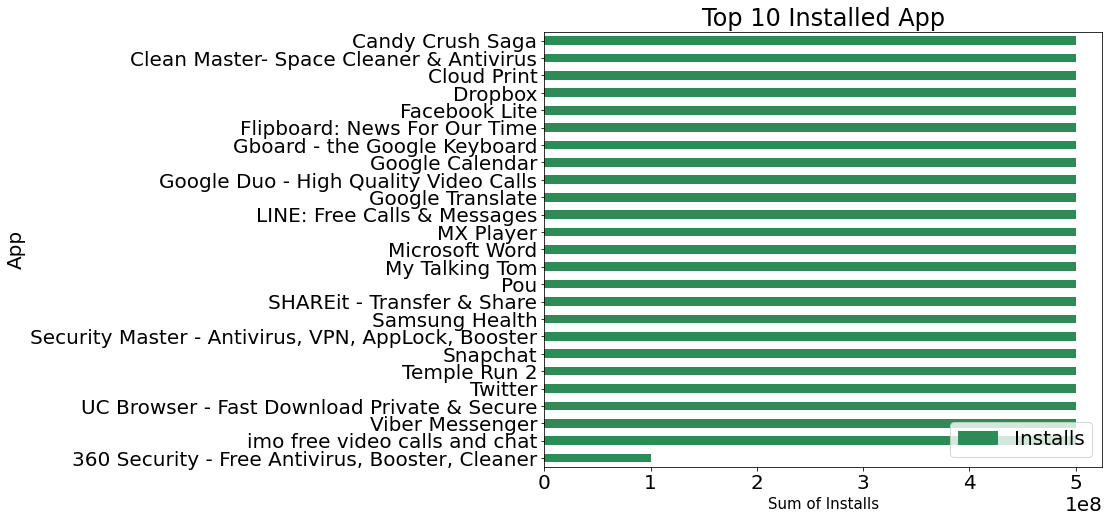

In [91]:
df.groupby('App')['Installs'].sum().nlargest(25).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 Installed App")
plt.ylabel('App')
plt.xlabel('Sum of Installs', size=15)
plt.legend()

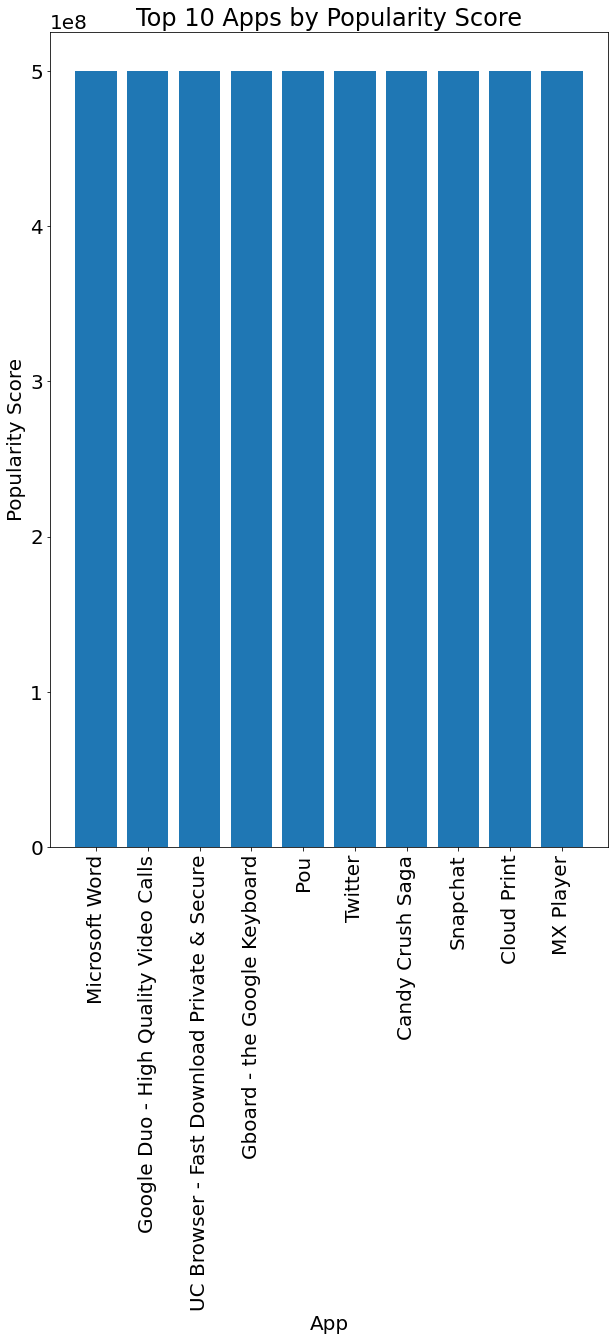

In [92]:
# Calculate the popularity score for each app by summing the number of installations
app_popularity = df.groupby('App')['Installs'].sum().reset_index()

# Sort the apps by popularity score in descending order
app_popularity = app_popularity.sort_values(by='Installs', ascending=False)

# Create a bar chart for the top 10 apps by popularity score
plt.bar(app_popularity['App'][:10], app_popularity['Installs'][:10])
plt.xticks(rotation=90)
plt.xlabel('App')
plt.ylabel('Popularity Score')
plt.title('Top 10 Apps by Popularity Score')
plt.show()

## Usability score

In [93]:
df[df['Rating'] == 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up


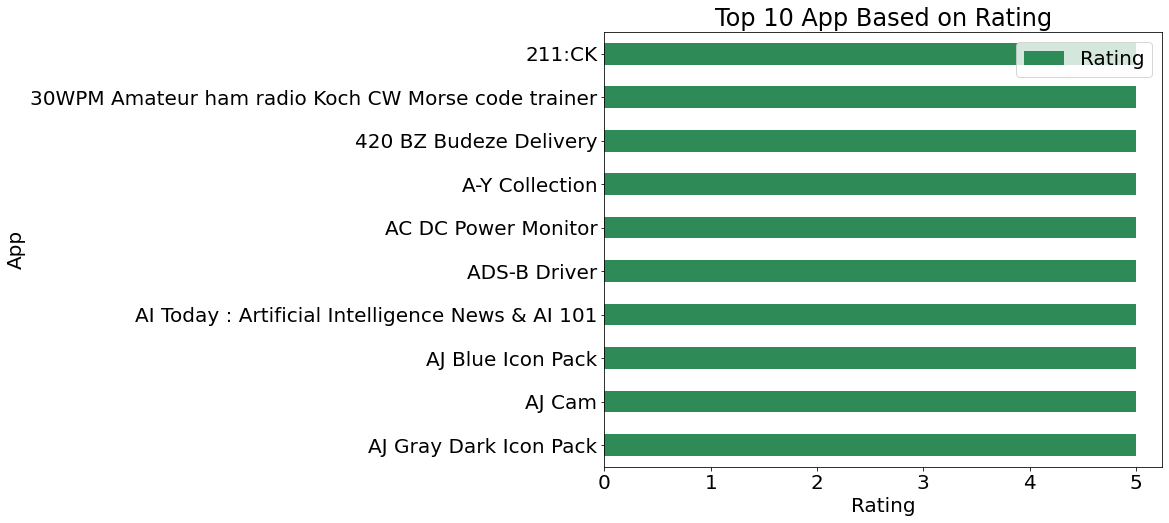

In [94]:
df.groupby('App')['Rating'].mean().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 App Based on Rating")
plt.ylabel('App')
plt.xlabel('Rating')
plt.legend()

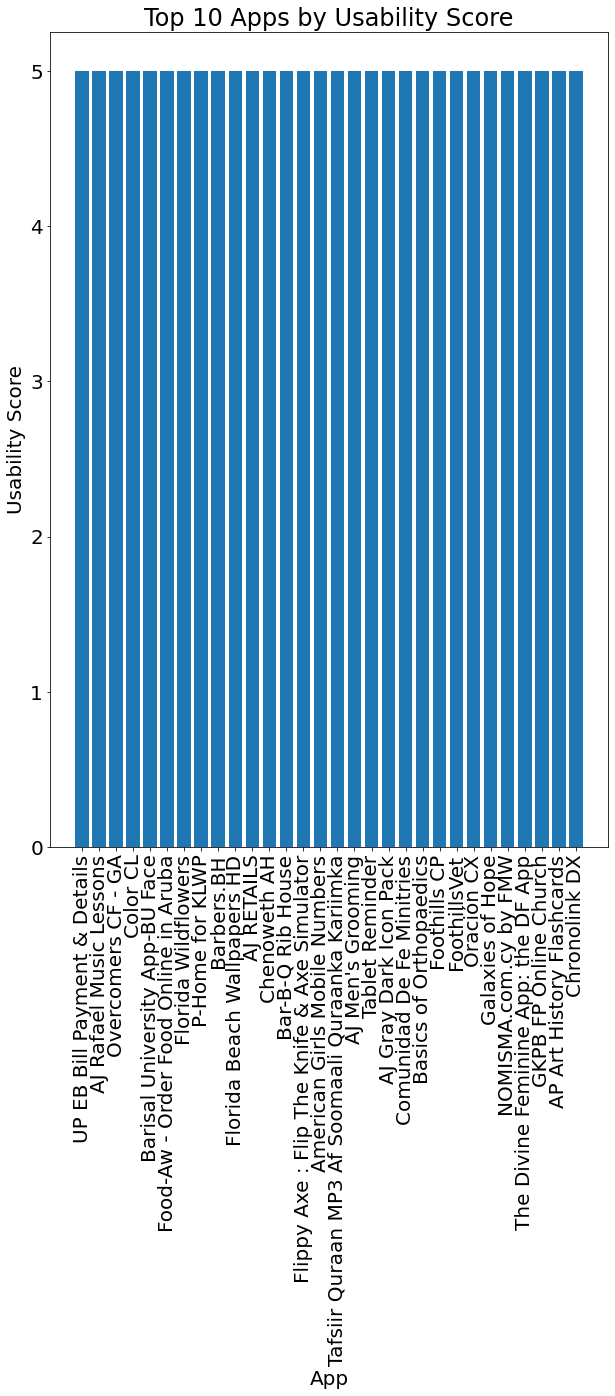

In [95]:
# Calculate the average rating for each app
usability_df = df.groupby('App')['Rating'].mean().reset_index()

# Sort the apps by usability score in descending order
usability_df = usability_df.sort_values('Rating', ascending=False)

# Create a bar chart for the top 10 apps by popularity score
plt.bar(usability_df['App'][:30], usability_df['Rating'][:30])
plt.xticks(rotation=90)
plt.xlabel('App')
plt.ylabel('Usability Score')
plt.title('Top 10 Apps by Usability Score')
plt.show()

In [96]:
usability_df = df.groupby('App')['Rating'].mean().reset_index()

## 3) Novelty Score

In [97]:
df_novelty = df[df['Installs'] < 10]

In [98]:
df_novelty

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
649,Healthy Relationships Guide,DATING,4.3,0,8.2000,1,Free,0.00,Everyone,Dating,2018-07-31,2.0,4.0.3 and up
652,PlusOne,DATING,4.3,0,10.0000,1,Free,0.00,Mature 17+,Dating,2018-07-17,1.1.1,4.2 and up
659,Diamond Engagement Rings,DATING,4.3,0,3.5000,5,Free,0.00,Everyone,Dating,2018-07-12,6.1,4.0 and up
2422,Visualmed,MEDICAL,4.3,0,3.1000,1,Paid,2.99,Everyone,Medical,2018-08-01,1.0,4.1 and up
2425,Be the Expert in Phlebotomy - Professional Nur...,MEDICAL,4.3,0,5.0000,1,Paid,0.99,Everyone,Medical,2018-07-24,1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,F-O-Meter,FAMILY,4.3,0,2.8000,1,Free,0.00,Mature 17+,Entertainment,2018-08-02,1.0.1,4.0 and up
10708,Custos F.O.,BUSINESS,4.3,0,9.7000,1,Free,0.00,Everyone,Business,2018-06-20,4.1.0,4.1 and up
10745,FP Boss,FINANCE,4.3,1,5.8000,1,Free,0.00,Everyone,Finance,2018-07-27,1.0.2,5.0 and up
10764,FP Transportation,AUTO_AND_VEHICLES,4.3,1,0.8643,1,Free,0.00,Everyone,Auto & Vehicles,2018-03-09,10.0.0,4.0 and up


In [99]:
# Create a list of popular apps
novelty_app = list(df_novelty['Installs'])

In [100]:
# Filter out the rows that contain the number of installs under 10
df_novelty = df[~df['Installs'].isin(novelty_app)]

In [101]:
df_novelty[df_novelty['Installs'] < 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [102]:
# Calculate the logarithm of the number of installations for each app
log_installs = np.log10(df_novelty['Installs'])

# Find the maximum logarithm of installations
max_log_installs = log_installs.max()

# Replace the infinity values in log_installs with a very high value
log_installs = np.where(np.isinf(log_installs), max_log_installs + 1, log_installs)

# Calculate the novelty score for each app
novelty_df = pd.DataFrame({'App': df_novelty['App'], 'Novelty_Score': max_log_installs - log_installs})

# Sort the apps by novelty score in descending order
novelty_df = novelty_df.sort_values('Novelty_Score', ascending=False)

In [103]:
# Merge novelty_df with df on the 'App' column
merged_df2 = df_novelty.merge(novelty_df, on='App')

# Keep only the columns we need
result_df = merged_df2[['App', 'Installs', 'Novelty_Score']]

# Sort the result by novelty score in descending order
result_df = result_df.sort_values('Novelty_Score', ascending=False)

# Show the result
print(result_df)

                                          App   Installs  Novelty_Score
8609                            Reisedealz.eu         10        7.69897
5747                         BV Taxi - Driver         10        7.69897
3270                          G-NetReport Pro         10        7.69897
5129                                BG Burger         10        7.69897
5756                       DHV accountancy BV         10        7.69897
...                                       ...        ...            ...
2909                                MX Player  500000000        0.00000
328     Google Duo - High Quality Video Calls  500000000        0.00000
3143  Clean Master- Space Cleaner & Antivirus  500000000        0.00000
2474                         Google Translate  500000000        0.00000
304             imo free video calls and chat  500000000        0.00000

[9465 rows x 3 columns]


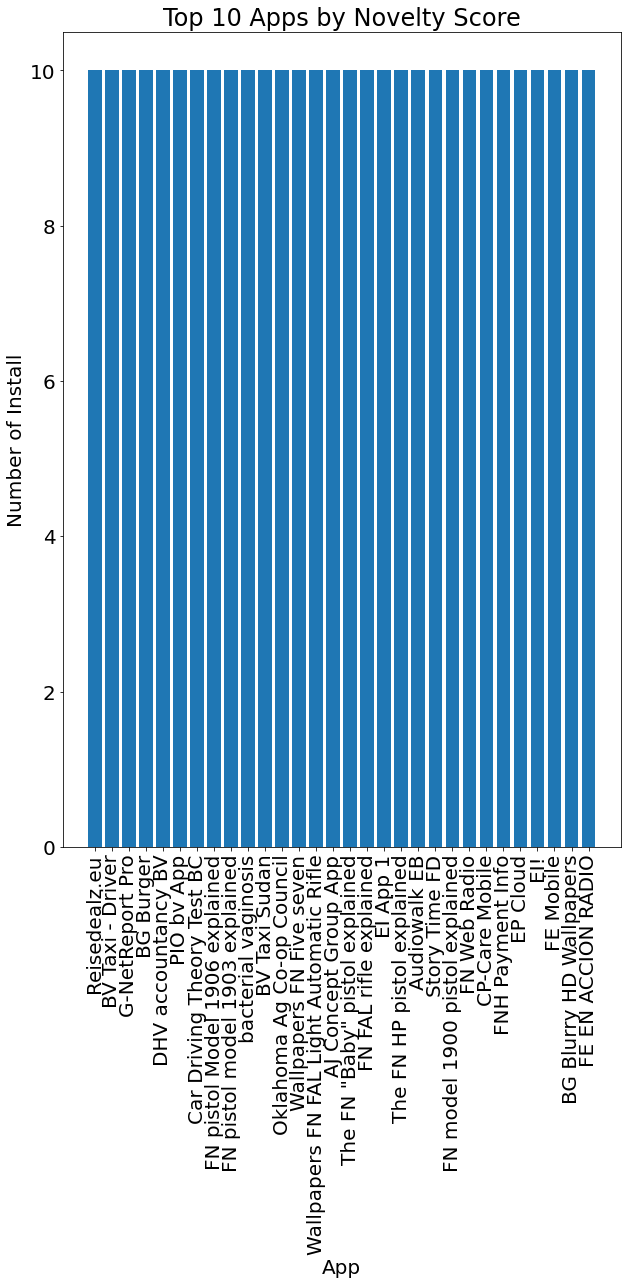

In [104]:
# Create a bar chart for the top 10 apps by popularity score
plt.bar(result_df['App'][:30], result_df['Installs'][:30])
plt.xticks(rotation=90)
plt.xlabel('App')
plt.ylabel('Number of Install')
plt.title('Top 10 Apps by Novelty Score')
plt.show()

## 4) Unique Strength

In [105]:
# Classify the sentiment polarity into positive, negative, or neutral based on a threshold value
threshold = 0.1
df2['Sentiment'] = np.where(df2['Sentiment_Polarity'] > threshold, 'Positive', 
                           np.where(df2['Sentiment_Polarity'] < -threshold, 'Negative', 'Neutral'))

# Calculate the proportion of positive reviews for each app
unique_strength_df = df2.groupby('App')['Sentiment'].apply(lambda x: (x == 'Positive').sum() / len(x)).reset_index()

In [106]:
# Classify the sentiment polarity into positive, negative, or neutral based on a threshold value
threshold = 0.1
df2['Sentiment'] = np.where(df2['Sentiment_Polarity'] > threshold, 'Positive', 
                           np.where(df2['Sentiment_Polarity'] < -threshold, 'Negative', 'Neutral'))

# Calculate the proportion of positive reviews for each app
unique_strength_df = df2.groupby('App')['Sentiment'].apply(lambda x: (x == 'Positive').sum() / len(x)).reset_index()
unique_strength_df = unique_strength_df.rename(columns={'Sentiment': 'Unique_Strength_Score'})

# Sort the apps by unique strength score in descending order
unique_strength_df = unique_strength_df.sort_values('Unique_Strength_Score', ascending=False).head(30)
print(unique_strength_df)

                                                   App  Unique_Strength_Score
761                                            Google+               1.000000
264                        Brightest Flashlight Free ®               1.000000
759                      Google Trips - Travel Planner               1.000000
321                                        Caller ID +               1.000000
758                                   Google Translate               1.000000
320  CallApp: Caller ID, Blocker & Phone Call Recorder               1.000000
756                                      Google Slides               1.000000
755                                      Google Primer               1.000000
316                     Calendar+ Schedule Planner App               1.000000
313                               Calculator Plus Free               1.000000
312                        Calculator - unit converter               1.000000
846                                           HomeWork          

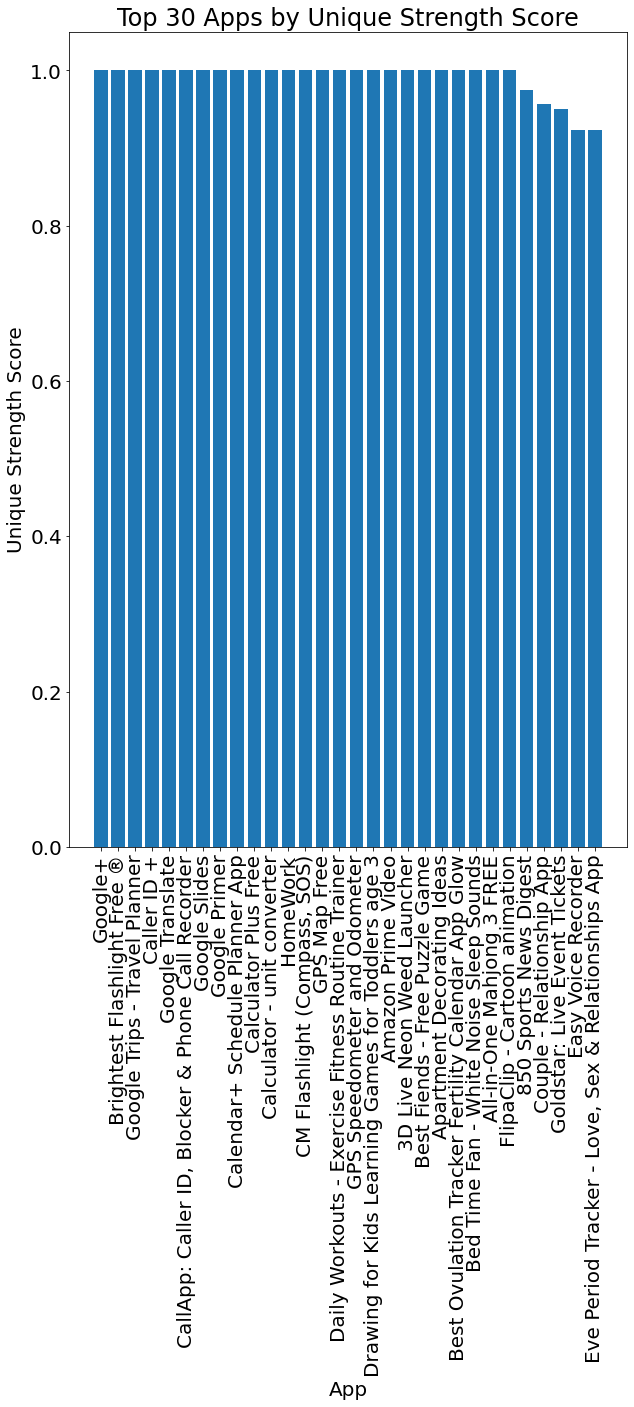

In [107]:
# Create a bar chart for the top 10 apps by popularity score
plt.bar(unique_strength_df['App'][:30], unique_strength_df['Unique_Strength_Score'][:30])
plt.xticks(rotation=90)
plt.xlabel('App')
plt.ylabel('Unique Strength Score')
plt.title('Top 30 Apps by Unique Strength Score')
plt.show()

In [108]:
threshold = 0.1
df2['Sentiment'] = np.where(df2['Sentiment_Polarity'] > threshold, 'Positive', 
                           np.where(df2['Sentiment_Polarity'] < -threshold, 'Negative', 'Neutral'))

# Calculate the proportion of positive reviews for each app
unique_strength_df = df2.groupby('App')['Sentiment'].apply(lambda x: (x == 'Positive').sum() / len(x)).reset_index()

## 5) Overall Score

In [109]:
# calculate the usability score
usability_score = df.groupby('App')['Rating'].mean()

# calculate the novelty score
novelty_score = df_novelty.groupby('App')['Installs'].max().apply(lambda x: max(0, (np.log10(x) - np.log10(10000))))

# calculate the unique strength score
threshold = 0.1 # set the threshold for positive sentiment polarity
sentiment_score = df2.groupby('App')['Sentiment_Polarity'].mean()
unique_strength_score = (sentiment_score > threshold).groupby('App').mean()

# calculate the overall score
popularity_weight = 0.4
usability_weight = 0.3
novelty_weight = 0.2
unique_strength_weight = 0.1

popularity_score = df.groupby('App')['Installs'].sum()
overall_score = (popularity_weight * popularity_score) + (usability_weight * usability_score) + (novelty_weight * novelty_score) + (unique_strength_weight * unique_strength_score)

# sort the apps by overall score in descending order
top_apps = overall_score.sort_values(ascending=False).head(7)

In [110]:
print(top_apps)

App
Google Duo - High Quality Video Calls    2.000000e+08
Flipboard: News For Our Time             2.000000e+08
Google Translate                         2.000000e+08
Dropbox                                  2.000000e+08
Candy Crush Saga                         2.000000e+08
Facebook Lite                            2.000000e+08
Gboard - the Google Keyboard             2.000000e+08
dtype: float64


## Ranking

### 1) Google Duo

In [111]:
GDuo = merged_df[merged_df['App'] == 'Google Duo - High Quality Video Calls']

In [112]:
GDuo[GDuo['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
3196,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Duo really good like FaceTime since I can't Fa...,Positive,0.600000,0.431250
3197,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Best quality video app. I used WhatsApp video ...,Positive,0.500000,0.150000
3199,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,The simplicity beautiful. It easy use. The wor...,Positive,0.237833,0.694667
3201,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,The really great honestly Google kind makes li...,Positive,0.440625,0.712500
3202,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Our home crappy internet... 1Mb/s crappy... Bu...,Positive,0.329167,0.556250
3203,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Great communication tool families chronic pain...,Positive,0.800000,0.750000
3204,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Switched Skype Skype garbage fire. Duo functio...,Positive,0.100000,0.483333
3205,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Really like using Duo Video Voice calls. Much ...,Positive,0.170000,0.310000
3206,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,It best time moment started using Huawei p20 l...,Positive,0.375000,0.462500
3207,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Love Google Duo! The clarity audio video impro...,Positive,0.545000,0.720000


In [113]:
GDuo[GDuo['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
3200,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Plz note points 1. Make like run slow networks...,Negative,-0.300000,0.400000
3211,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Need add option able silence vibration ringing...,Negative,-0.133333,0.608333


### 2) Flipboard

In [114]:
Flipboard = merged_df[merged_df['App'] == 'Flipboard: News For Our Time']

In [115]:
Flipboard[Flipboard['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
33619,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,I like easy use. Seamless. And way suggests ri...,Positive,0.273016,0.489683
33620,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,Love it! My go-to news! Who needs TV flipboard!,Positive,0.976562,0.600000
33621,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,The gives quick overlook current events.,Positive,0.166667,0.450000
33622,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,I like personalize kind articles come up.,Positive,0.600000,0.900000
33623,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,It better news,Positive,0.500000,0.500000
33624,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,LOVE THE TECH AND SCIENCE,Positive,0.500000,0.600000
33628,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,Great reads time,Positive,0.800000,0.750000
33629,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,Think great,Positive,0.800000,0.750000
33630,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,Very informative.,Positive,0.200000,0.300000
33631,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,You'll news they're happening. Very recommenda...,Positive,0.200000,0.300000


In [116]:
Flipboard[Flipboard['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


### 3) Google Translate

In [117]:
GTrans = merged_df[merged_df['App'] == 'Google Translate']

In [118]:
GTrans[GTrans['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [119]:
GTrans[GTrans['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
28590,Google Translate,TOOLS,4.4,5745093,NaN,500000000,Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device,"It good ""Word"" translation only. Even sometime...",Positive,0.240000,0.58
28591,Google Translate,TOOLS,4.4,5745093,NaN,500000000,Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device,"Very nice you are, Nice., A small Roy: It shou...",Positive,0.188333,0.40


### 4) Dropbox

In [120]:
Dropbox = merged_df[merged_df['App'] == 'Dropbox']

In [121]:
Dropbox[Dropbox['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
31531,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,crashes every time I try manually upload image...,Negative,-0.750000,1.000000
31536,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Every 4 5 times I open it, starts slow eventua...",Negative,-0.150000,0.450000
31539,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Idiotic app, keep hanging takes much space phone",Negative,-0.233333,0.516667
31562,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Get app, little space, at least 25 GB...",Negative,-0.243750,0.450000
31569,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,crashes every time I try manually upload image...,Negative,-0.750000,1.000000
31574,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Every 4 5 times I open it, starts slow eventua...",Negative,-0.150000,0.450000
31577,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Idiotic app, keep hanging takes much space phone",Negative,-0.233333,0.516667
31600,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Get app, little space, at least 25 GB...",Negative,-0.243750,0.450000


In [122]:
Dropbox[Dropbox['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
31526,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Could what's new box actually tell us what's n...,Positive,0.116477,0.336364
31528,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Best,Positive,1.000000,0.300000
31529,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Useless app.. Hard data Dropbox slow speed 4gb...,Positive,0.015476,0.577381
31532,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Nice ever.. Why many people understand permiss...,Positive,0.550000,0.750000
31533,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,"Videos crash halfway, much UI, can't export en...",Positive,0.050000,0.556250
31534,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,The UI simple easy navigate. Only issue I have...,Positive,0.109830,0.598575
31537,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Love automatically sync Dropbox account. It sa...,Positive,0.033333,0.600000
31538,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,I love app. Fits perfectly everything I do. It...,Positive,0.700000,0.533333
31541,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Good maybe good storage free try like 5gb,Positive,0.600000,0.666667
31542,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,I prefer Dropbox one-note day. Great,Positive,0.800000,0.750000


- Negative sentiment : 8
- Positive sentiment : 46

### 5) Candy Crush Saga

In [123]:
Candy = merged_df[merged_df['App'] == 'Candy Crush Saga']

In [124]:
Candy[Candy['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
13548,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"Since latest update, bouncing 'suggestions' ha...",Negative,-0.159524,0.585714
13550,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"After 5 years giving 5 stars game, today I low...",Negative,-0.310185,0.386111
13551,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,I played game least 5 years restart 3 times. T...,Negative,-0.158482,0.271429
13552,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,I addicted issues. Lol. I currently level 1969...,Negative,-0.117593,0.433333
13553,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,I would enjoy game SO MUCH MORE option turn fl...,Negative,-0.012955,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13776,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,Good game evolved positively. Though idea cant...,Negative,-0.009091,0.618182
13777,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,I hate game mostly. It infuriating times. I re...,Negative,-0.277273,0.484091
13778,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,My boyfriend level 376 finished level sugar cr...,Negative,-0.038095,0.311905
13779,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,Game play constantly tweaked revenue expense u...,Negative,-0.133333,0.411111


In [125]:
Candy[Candy['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
13542,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"If get free lives refill, continue accumulate ...",Positive,0.374411,0.556987
13543,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,My original rating 01/2015 5 Stars still holdi...,Positive,0.250000,0.475000
13544,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"This good time passing game. However, I like l...",Positive,0.200926,0.437963
13545,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"Fun first, spending two weeks level makes want...",Positive,0.183333,0.296825
13546,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,Please get rid amount pop ups love things holy...,Positive,0.319444,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13770,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"It would 5 stars, 6 hours unlimited life..... ...",Positive,0.115625,0.487500
13772,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,"Addicting, fun game really needs update lets b...",Positive,0.317383,0.334375
13773,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,Quit suggesting matches.... toddler understand...,Positive,0.500000,0.541667
13774,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,This game awesome pass time. I noticed levels ...,Positive,0.083333,0.366667


### 6) Facebook Lite

In [126]:
Fb = merged_df[merged_df['App'] == 'Facebook Lite']

In [127]:
Fb[Fb['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
22927,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"I wrong. Thought buggy original Facebook app, ...",Positive,0.021023,0.420909
22928,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"can't login cause sms code received, disable 2...",Positive,0.125000,0.166667
22929,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,I real shock today third party open dialog box...,Positive,0.011111,0.300000
22931,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,Permissions ridiculous. On default. After turn...,Positive,0.066667,0.600000
22932,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,I think problem update 29th July 2018. My news...,Positive,0.045833,0.556944
22933,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,I really like app. But I want able copy paste ...,Positive,0.152083,0.391667
22934,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"It's really good! search, groups, etc. keeps s...",Positive,0.875000,0.600000
22942,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,I like apart thing important thing me. The kee...,Positive,0.250000,0.850000
22945,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,A nice small footprint play videos tablet full...,Positive,0.298958,0.650000
22947,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,Its good I dont like I cant upload video 20 MP...,Positive,0.600000,0.612500


In [128]:
Fb[Fb['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
22930,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"When I install first work well, 1 day loading ...",Negative,-0.025000,0.366667
22937,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"Don't like layout !! Nor pull see new posts , ...",Negative,-0.012950,0.450758
22938,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,clunky hardly works all. comments posts- can't...,Negative,-0.051667,0.393095
22939,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"Always show open app ""Sorry, something went wr...",Negative,-0.256484,0.730000
22940,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,Bad experience. The earlier version fb lite ne...,Negative,-0.250000,0.516667
22941,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,When I made 2nd id started sharing page conten...,Negative,-0.200000,0.400000
22943,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,Does play videos. Loading speed slow. While wa...,Negative,-0.150000,0.200000
22944,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"works complete reinstall, alright, basically a...",Negative,-0.021875,0.325000
22946,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,Quick suggestion: really annoying get notifica...,Negative,-0.011111,0.744444
22948,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,"I fb lite fb official app. But days, Fb lite w...",Negative,-0.250000,0.500000


### 7) GBoard

In [129]:
Gboard = merged_df[merged_df['App'] == 'Gboard - the Google Keyboard']

In [130]:
Gboard[Gboard['Sentiment'] == 'Negative']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
28821,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,This used actually learn I spoke (typed) prett...,Negative,-0.015152,0.572727
28824,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,Gifs work I'm getting super frustrated!! I tri...,Negative,-0.121717,0.620202
28827,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,It's got zillions emojis gifs national keyboar...,Negative,-0.108333,0.383333
28828,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,Beauty. Especially translation part. There anc...,Negative,-0.311667,0.821667
28829,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,The autocorrect function terrible Please make ...,Negative,-0.033333,0.575000
28832,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,I would give 5 stars clip board access recent ...,Negative,-0.116667,0.650000
28834,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,"I feeling bad give 2 stars, I using keyboard s...",Negative,-0.098333,0.601667
28835,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,"Can please lite used type words, know way peop...",Negative,-0.462857,0.738095
28836,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,"Very good keyboard generally, glaring omission...",Negative,-0.013333,0.378601
28838,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,This broken me. I swype type sometimes work. W...,Negative,-0.237500,0.412500


In [131]:
Gboard[Gboard['Sentiment'] == 'Positive']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
28814,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,This pretty good except typing slide part. Tha...,Positive,0.110000,0.335000
28815,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,This best keyboard. The ability different them...,Positive,0.345000,0.560833
28816,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,I keyboard typing English Bengali language. Bu...,Positive,0.020833,0.262500
28817,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,At first seems fine honesty I used new feature...,Positive,0.154377,0.449158
28818,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,The inbuilt keyboard 10+ year old previous HTC...,Positive,0.114286,0.384127
28819,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,Overall good implementation daily keyboard loo...,Positive,0.050000,0.504545
28820,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,I love Google keyboard awesome! I love search ...,Positive,0.344444,0.822222
28822,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,I've using Gboard ever since swipe. It progres...,Positive,0.566667,0.533333
28823,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,The search option keyboard recently stopped wo...,Positive,0.208333,0.375000
28825,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,The working great update made spell checker (r...,Positive,0.231250,0.237500


## Ranking

**Google Duo**
- Sentiment Positive > Negative
- Rating : 4,6

**Flipboard**
- Sentiment Positive > Negative
- Rating : 4,4

**Google Translate**
- Sentiment Positive > Negative (Translated review hanya 2)
- Rating : 4,4
- Last update : 04/08/2018

**Dropbox**
- Sentiment Positive > Negative
- Rating : 4,4

**Candy Crush Saga**
- Sentiment Positive < Negative
- Rating : 4,4

**Facebook Lite**
- Sentiment Positive (12) < Negative(14)
- Rating : 4,3
- Last update : 01/08/2018

**Gboard**
- Sentiment Positive (40) > Negative (34)
- Rating : 4,2
- Last update : 31/07/2018

## Top 5 App

- **Google Duo**
- **Flipboard**
- **Dropbox**
- **Google Translate**
- **Gboard**

In [132]:
topapps = [GDuo, Flipboard, Dropbox, GTrans, Gboard]

In [133]:
Google Duo - High Quality Video Calls    2.000000e+08
Flipboard: News For Our Time             2.000000e+08
Google Translate                         2.000000e+08
Dropbox                                  2.000000e+08
Candy Crush Saga                         2.000000e+08
Facebook Lite                            2.000000e+08
Gboard - the Google Keyboard             2.000000e+08

SyntaxError: invalid syntax (Temp/ipykernel_104348/4189681520.py, line 1)

### Create new dataframe from Top 5 App

In [134]:
# Define the list of top 5 apps
top_5_apps = ['Google Duo - High Quality Video Calls','Flipboard: News For Our Time','Google Translate','Dropbox','Gboard - the Google Keyboard']

# Select the rows of the original dataframe that match the top 5 apps
top_5_df = df[df['App'].isin(top_5_apps)]

# Create a new dataframe from the selected rows
new_df = pd.DataFrame({
    'App': top_5_df['App'],
    'Category': top_5_df['Category'],
    'Rating': top_5_df['Rating'],
    'Reviews': top_5_df['Reviews'],
    'Size': top_5_df['Size'],
    'Installs': top_5_df['Installs'],
    'Type': top_5_df['Type'],
    'Price': top_5_df['Price'],
    'Content Rating': top_5_df['Content Rating'],
    'Genres': top_5_df['Genres'],
    'Last Updated': top_5_df['Last Updated'],
    'Current Ver': top_5_df['Current Ver'],
    'Android Ver': top_5_df['Android Ver']
})

In [135]:
new_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up
3235,Google Translate,TOOLS,4.4,5745093,NaN,500000000,Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,500000000,Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device
3473,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device
3755,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,NaN,500000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device


In [136]:
# Define the list of top 5 apps
top_5_apps = ['Google Duo - High Quality Video Calls','Flipboard: News For Our Time','Google Translate','Dropbox','Gboard - the Google Keyboard']

# Select the rows of the original dataframe that match the top 5 apps
top_5_df = merged_df[merged_df['App'].isin(top_5_apps)]

# Create a new dataframe from the selected rows
new_df_merged = pd.DataFrame({
    'App': top_5_df['App'],
    'Category': top_5_df['Category'],
    'Rating': top_5_df['Rating'],
    'Reviews': top_5_df['Reviews'],
    'Size': top_5_df['Size'],
    'Installs': top_5_df['Installs'],
    'Type': top_5_df['Type'],
    'Price': top_5_df['Price'],
    'Content Rating': top_5_df['Content Rating'],
    'Genres': top_5_df['Genres'],
    'Last Updated': top_5_df['Last Updated'],
    'Current Ver': top_5_df['Current Ver'],
    'Android Ver': top_5_df['Android Ver'],
    'Translated Review' : top_5_df['Translated_Review'],
    'Sentiment' : top_5_df['Sentiment'],
    'Sentiment Polarity' : top_5_df['Sentiment_Polarity'],
    'Sentiment Subjectivity' : top_5_df['Sentiment_Subjectivity']
})

In [137]:
new_df_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated Review,Sentiment,Sentiment Polarity,Sentiment Subjectivity
3196,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Duo really good like FaceTime since I can't Fa...,Positive,0.600000,0.431250
3197,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Best quality video app. I used WhatsApp video ...,Positive,0.500000,0.150000
3198,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,"I used 9 months NO problems, UNTIL updated. On...",Neutral,0.000000,0.000000
3199,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,The simplicity beautiful. It easy use. The wor...,Positive,0.237833,0.694667
3200,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,Plz note points 1. Make like run slow networks...,Negative,-0.300000,0.400000


In [138]:
new_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 3196 to 33631
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     185 non-null    object        
 1   Category                185 non-null    object        
 2   Rating                  185 non-null    float64       
 3   Reviews                 185 non-null    int32         
 4   Size                    76 non-null     float64       
 5   Installs                185 non-null    int64         
 6   Type                    185 non-null    object        
 7   Price                   185 non-null    float64       
 8   Content Rating          185 non-null    object        
 9   Genres                  185 non-null    object        
 10  Last Updated            185 non-null    datetime64[ns]
 11  Current Ver             185 non-null    object        
 12  Android Ver             185 non-null    objec

### Analyze Top 5 App

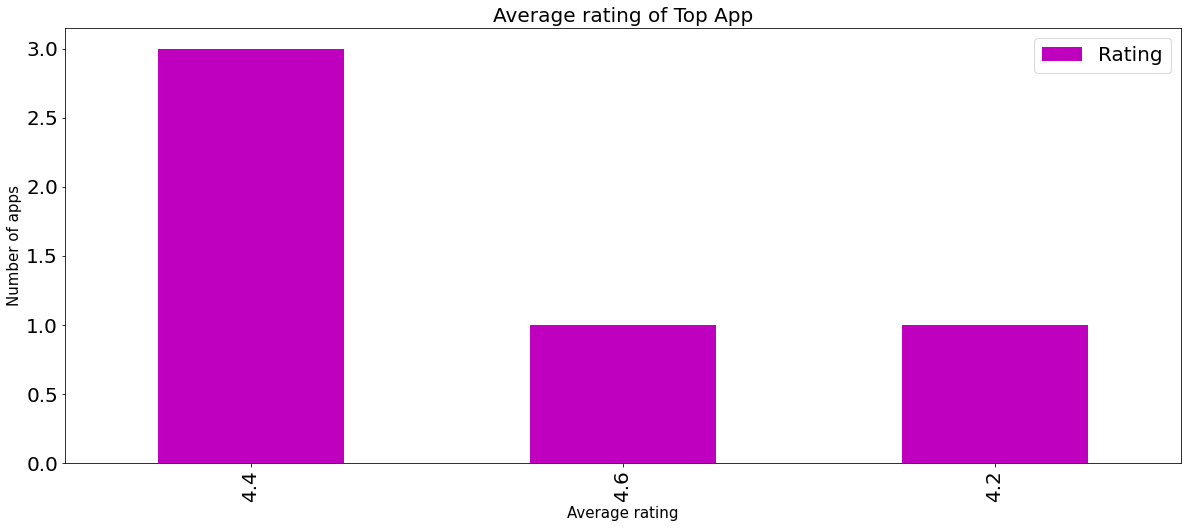

In [139]:
# Average app ratings

new_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of Top App', fontsize = 20)
plt.legend()

Text(0.5, 1.0, 'Total app average rating')

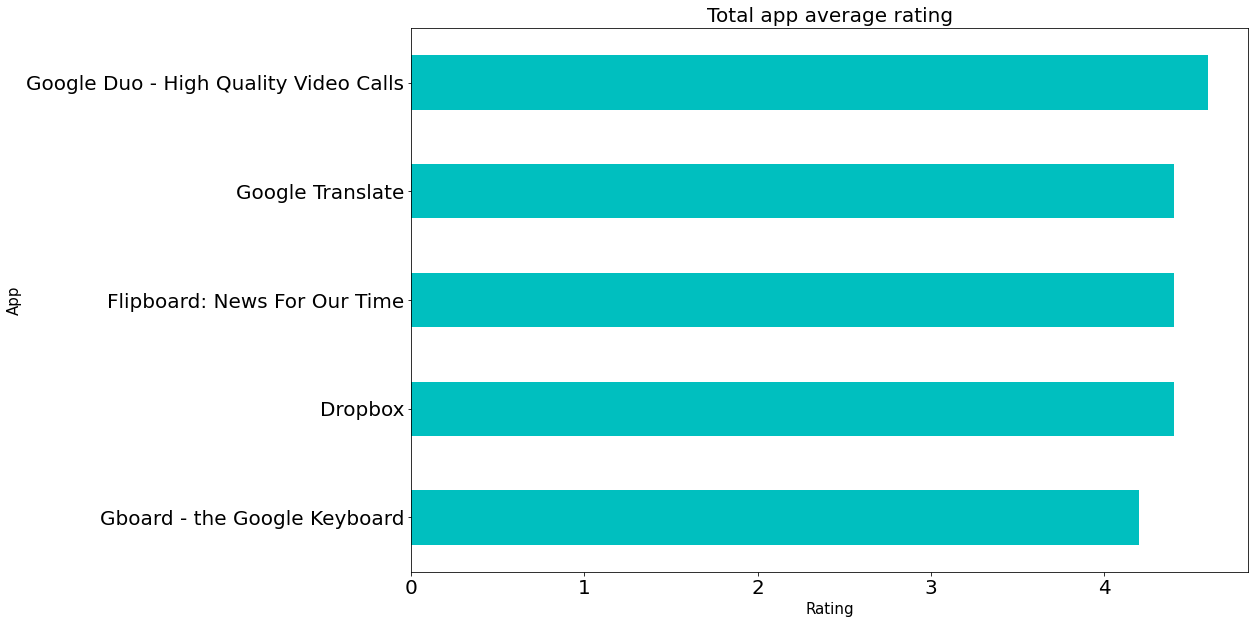

In [140]:
a = new_df.groupby(['App'])['Rating'].mean().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('App', fontsize = 15)
plt.xticks()
plt.title('Total app average rating', fontsize = 20)

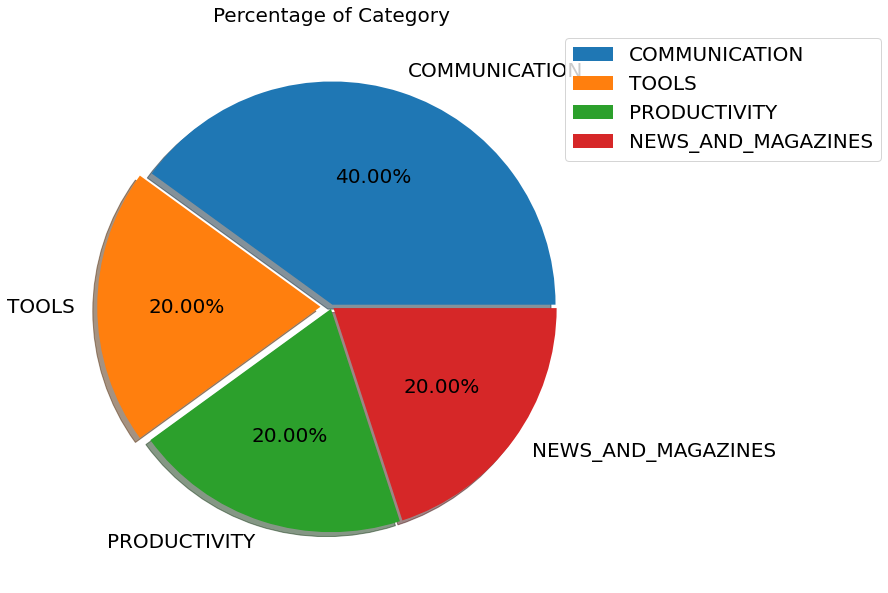

In [141]:
counts = list(new_df['Category'].value_counts())
labels = 'COMMUNICATION','TOOLS','PRODUCTIVITY','NEWS_AND_MAGAZINES'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.01, 0.01], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Category', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

Text(0.5, 1.0, 'Top App Based on number of Review')

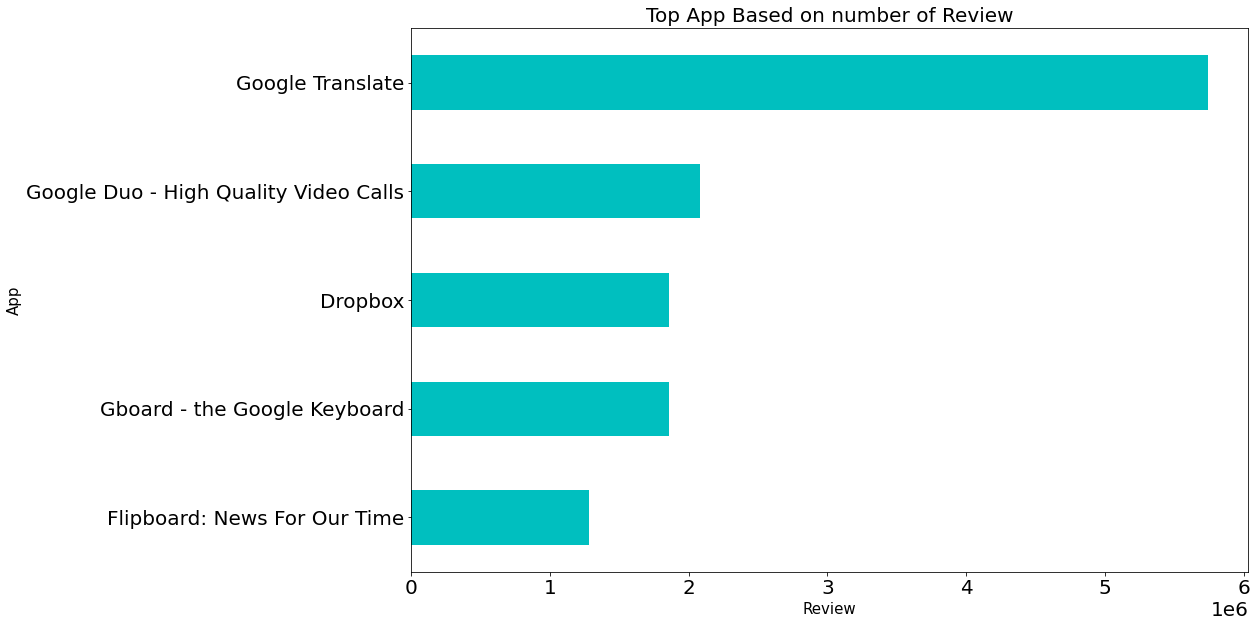

In [142]:
a = new_df.groupby(['App'])['Reviews'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.xlabel('Review', fontsize = 15)
plt.ylabel('App', fontsize = 15)
plt.xticks()
plt.title('Top App Based on number of Review', fontsize = 20)

### Wordcloud

In [162]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 194.8 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [163]:
pip install --upgrade Pillow

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hp\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 2.5/2.5 MB 212.6 kB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the font path to a TrueType font file
font_path = 'arial.ttf'

# Generate the wordcloud
wordcloud = WordCloud(font_path=font_path).generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataframe to only include rows where the sentiment is positive
positive_df = new_df_merged[new_df_merged['Sentiment'] == 'Positive']

# Group the data by app name and concatenate all the positive sentiment text for each app into one long string
positive_text = positive_df.groupby('App')['Translated Review'].apply(lambda x: ' '.join(x)).reset_index()

# Create a WordCloud object
wc = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='tab10')

# Generate the word cloud for each app
for i in range(5): # assuming you want to generate for the top 5 apps
    app_name = top_5_df['App'].iloc[i]
    text = positive_text[positive_text['App'] == app_name]['Translated Review'].iloc[0]
    wc.generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(app_name + ' - Positive Sentiment Word Cloud')
    plt.show()


ValueError: Only supported for TrueType fonts